In [2]:
!pip install transformers datasets scikit-learn wordcloud nltk accelerate


## For Hugging Face Datasets

In [3]:
pip install datasets

## Import Required Libraries

In [4]:
# ---------------------------
# Import Libraries
# ---------------------------
from datasets import load_dataset
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Pre-Processing + Star Mapping

In [5]:
!pip install -U datasets


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

<ipython-input-6-17b886900f06>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='Set2', order=['positive', 'neutral', 'negative'])


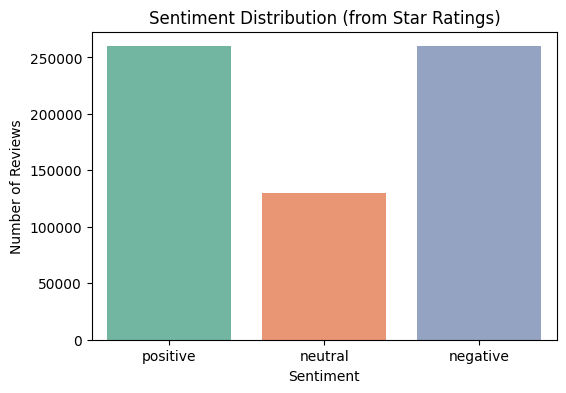

<ipython-input-6-17b886900f06>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='star_rating', palette='coolwarm')


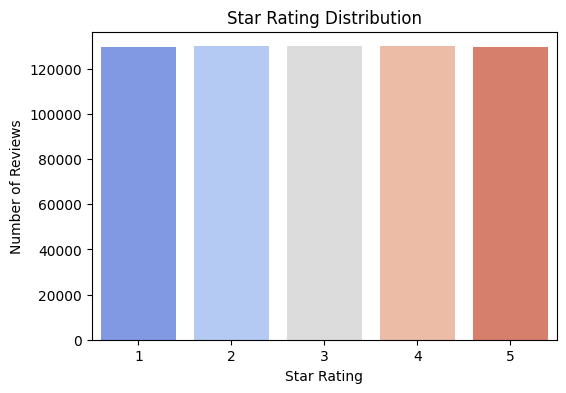

                                                text  star_rating  \
0  dr goldberg offers everything i look for in a ...            5   
1  unfortunately the frustration of being dr gold...            2   
2  been going to dr goldberg for over years i thi...            4   
3  got a letter in the mail last week that said d...            4   
4  i dont know what dr goldberg was like before m...            1   

  sentiment_label  
0        positive  
1        negative  
2        positive  
3        positive  
4        negative  


In [6]:
# ---------------------------
# Load Yelp Review Dataset
# ---------------------------
# Clear any previously broken/incomplete downloads
!rm -rf ~/.cache/huggingface/datasets/yelp_review_full

# Reload the dataset fresh
dataset = load_dataset("yelp_review_full", split="train")
df = dataset.to_pandas()

# ---------------------------
# Preprocess Review Text
# ---------------------------
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text'] = df['text'].apply(preprocess_text)
df['review_length'] = df['text'].apply(len)

# ---------------------------
# Filter Out Short Reviews
# ---------------------------
df = df[df['review_length'] > 10].reset_index(drop=True)

# ---------------------------
# Map Label to Star Rating (1–5) and Sentiment Category
# ---------------------------
df['star_rating'] = df['label'] + 1  # Convert label 0–4 to 1–5 stars

def map_sentiment(star):
    if star <= 2:
        return 'negative'
    elif star == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment_label'] = df['star_rating'].apply(map_sentiment)

# ---------------------------
# Visualization: Sentiment Distribution
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', palette='Set2', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution (from Star Ratings)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# ---------------------------
# Visualization: Star Ratings
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='star_rating', palette='coolwarm')
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

# ---------------------------
# Final Cleaned DataFrame Preview
# ---------------------------
df_cleaned = df[['text', 'star_rating', 'sentiment_label']]
print(df_cleaned.head())

## 📊 Visualization

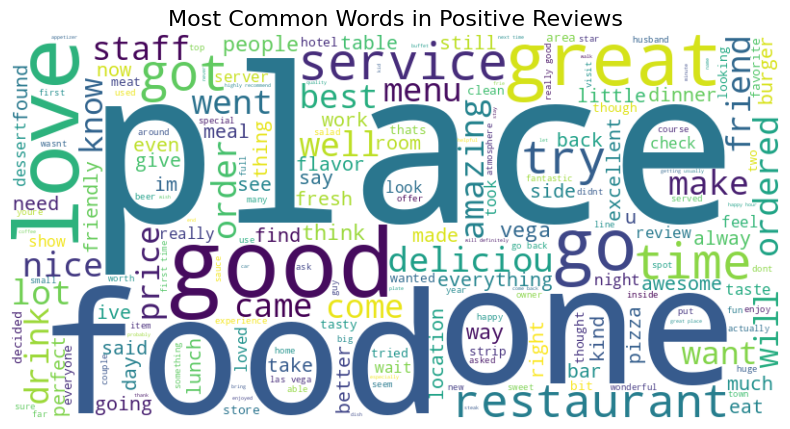

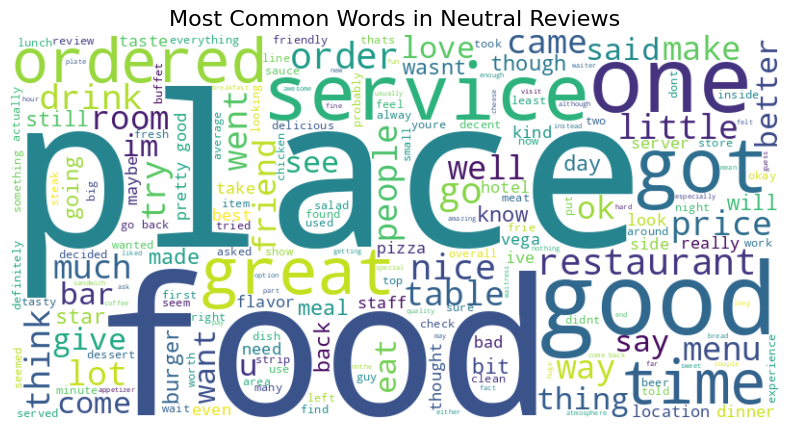

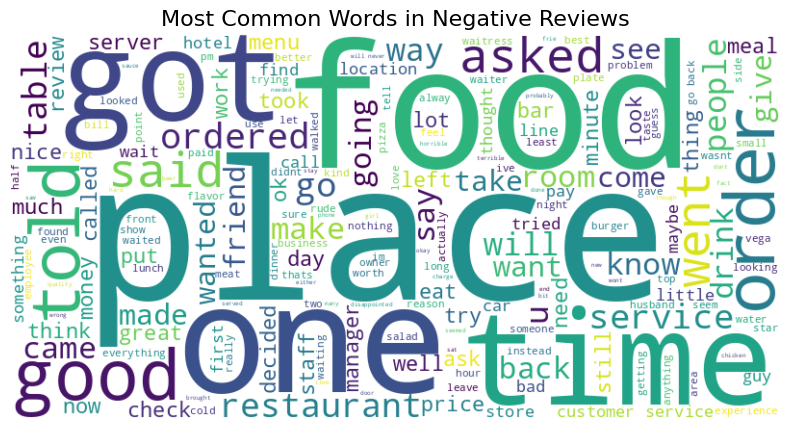

In [7]:
# ---------------------------
# Import WordCloud
# ---------------------------
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ---------------------------
# Function to Generate and Display WordCloud
# ---------------------------
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# ---------------------------
# Concatenate Reviews by Sentiment
# ---------------------------
positive_text = " ".join(df[df['sentiment_label'] == 'positive']['text'].tolist())
neutral_text = " ".join(df[df['sentiment_label'] == 'neutral']['text'].tolist())
negative_text = " ".join(df[df['sentiment_label'] == 'negative']['text'].tolist())

# ---------------------------
# Generate Word Clouds
# ---------------------------
plot_wordcloud(positive_text, 'Most Common Words in Positive Reviews')
plot_wordcloud(neutral_text, 'Most Common Words in Neutral Reviews')
plot_wordcloud(negative_text, 'Most Common Words in Negative Reviews')

## Keyword Frequency Bar Plots by Sentiment

<ipython-input-8-b7a55f5d9989>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='viridis')


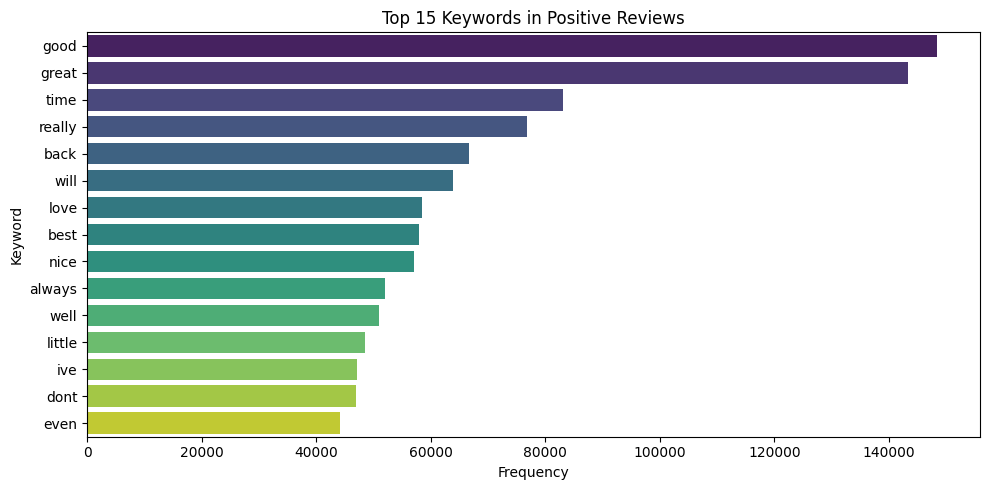

<ipython-input-8-b7a55f5d9989>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='viridis')


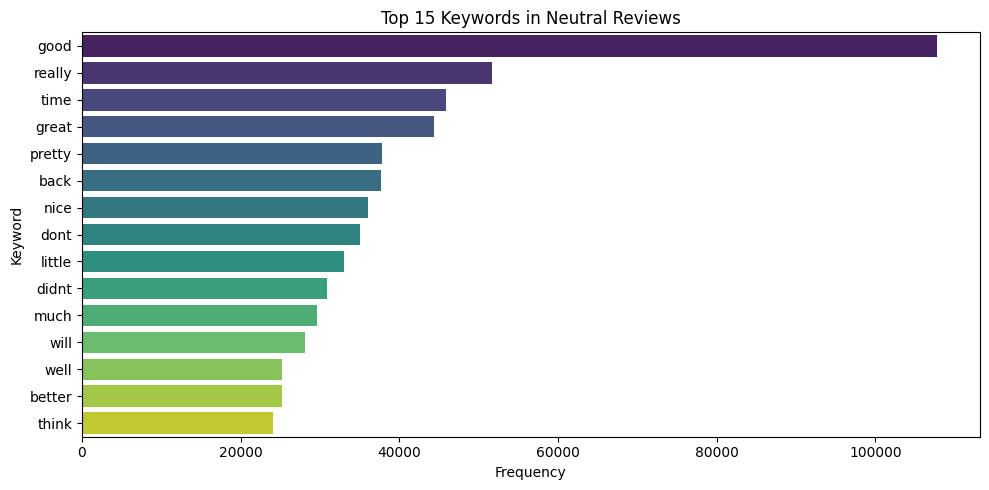

<ipython-input-8-b7a55f5d9989>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='count', y='word', palette='viridis')


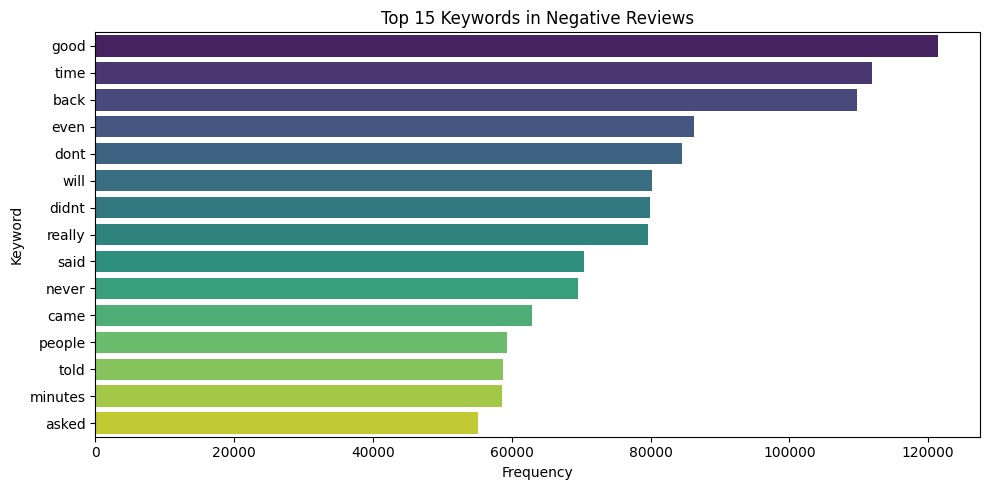

In [8]:
from collections import Counter

# ---------------------------
# Tokenizer with Cleaning & Stopword Removal
# ---------------------------
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS).union({
    'food', 'place', 'restaurant', 'service', 'order', 'ordered', 'staff',
    'location', 'menu', 'one', 'got', 'would', 'went', 'also', 'like', 'us', 'get'
})

def tokenize(text):
    tokens = re.findall(r'\b[a-z]{3,}\b', text.lower())  # only alphabetic, 3+ letters
    return [word for word in tokens if word not in stopwords]

# ---------------------------
# Function to Plot Top Keywords for a Sentiment
# ---------------------------
def plot_top_keywords(df_subset, sentiment_label, top_n=15):
    all_words = []
    for text in df_subset['text']:
        all_words.extend(tokenize(text))
    word_freq = Counter(all_words).most_common(top_n)

    # Convert to DataFrame
    words_df = pd.DataFrame(word_freq, columns=['word', 'count'])

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(data=words_df, x='count', y='word', palette='viridis')
    plt.title(f'Top {top_n} Keywords in {sentiment_label.capitalize()} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.tight_layout()
    plt.show()

# ---------------------------
# Generate Keyword Frequency Plots
# ---------------------------
plot_top_keywords(df[df['sentiment_label'] == 'positive'], 'positive')
plot_top_keywords(df[df['sentiment_label'] == 'neutral'], 'neutral')
plot_top_keywords(df[df['sentiment_label'] == 'negative'], 'negative')


## Visualize Top Bigrams by Sentiment

<ipython-input-9-b79c4100f622>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_df, x='count', y='phrase', palette='magma')


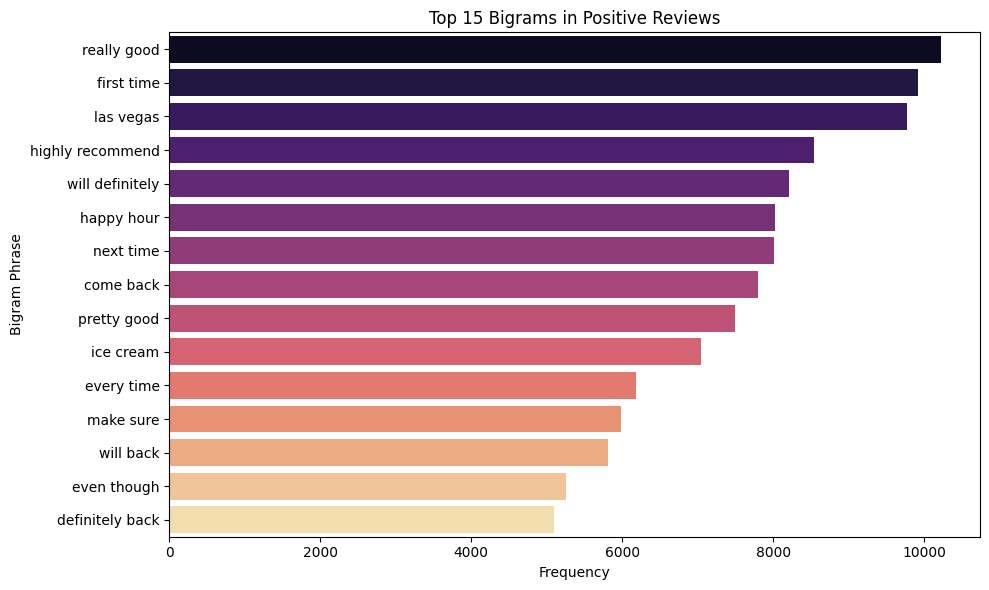

<ipython-input-9-b79c4100f622>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_df, x='count', y='phrase', palette='magma')


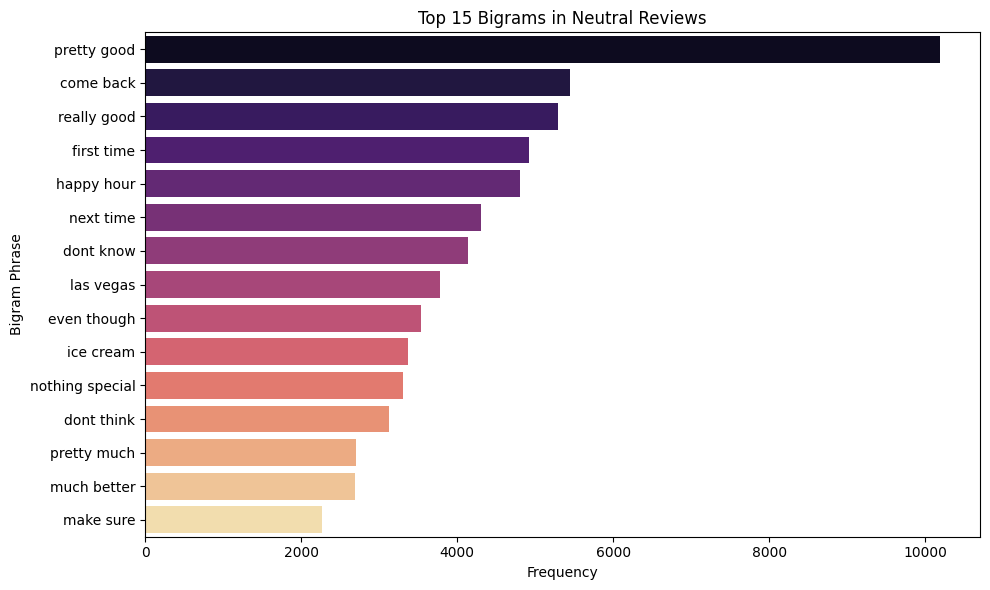

<ipython-input-9-b79c4100f622>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigrams_df, x='count', y='phrase', palette='magma')


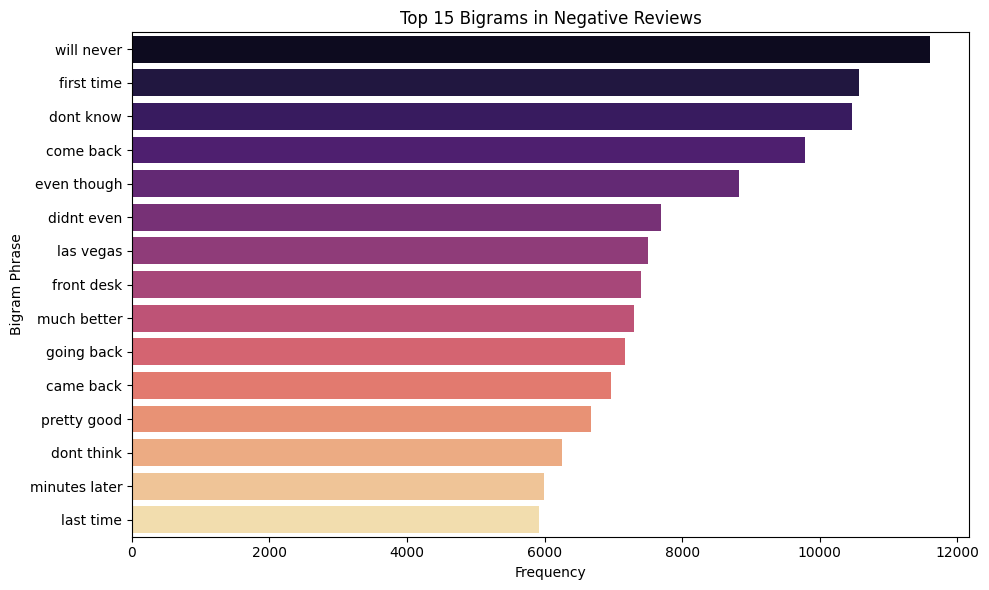

In [9]:
# ---------------------------
# Import Required Libraries
# ---------------------------
from collections import Counter
from nltk.util import ngrams

# ---------------------------
# Simple Tokenizer for Bigrams (No NLTK Tokenizer)
# ---------------------------
def tokenize_for_bigrams(text):
    tokens = re.findall(r'\b[a-z]{3,}\b', text.lower())  # Keep alphabetic words of length ≥3
    return [word for word in tokens if word not in stopwords]

def get_top_bigrams(texts, n=20):
    bigram_counts = Counter()
    for text in texts:
        tokens = tokenize_for_bigrams(text)
        bigrams = ngrams(tokens, 2)
        bigram_counts.update(bigrams)
    return bigram_counts.most_common(n)

# ---------------------------
# Plot Top Bigrams for Each Sentiment
# ---------------------------
def plot_top_bigrams(df_subset, sentiment_label, top_n=15):
    top_bigrams = get_top_bigrams(df_subset['text'], top_n)
    bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'count'])
    bigrams_df['phrase'] = bigrams_df['bigram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(10, 6))
    sns.barplot(data=bigrams_df, x='count', y='phrase', palette='magma')
    plt.title(f'Top {top_n} Bigrams in {sentiment_label.capitalize()} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Bigram Phrase')
    plt.tight_layout()
    plt.show()

# ---------------------------
# Generate Plots for Each Sentiment
# ---------------------------
plot_top_bigrams(df[df['sentiment_label'] == 'positive'], 'positive')
plot_top_bigrams(df[df['sentiment_label'] == 'neutral'], 'neutral')
plot_top_bigrams(df[df['sentiment_label'] == 'negative'], 'negative')


## Train DistilBERT for 5-Class Sentiment

In [10]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np

# -------------- 1. Prepare Dataset --------------
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_len)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Convert star_rating 1–5 → labels 0–4
df['star_rating'] = df['star_rating'] - 1
X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), df['star_rating'].tolist(), test_size=0.2, stratify=df['star_rating'])

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_data = ReviewDataset(X_train, y_train, tokenizer)
test_data = ReviewDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32)

# -------------- 2. Load Model --------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=5)
model.to(device)

# -------------- 3. Training Loop --------------
optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
for epoch in range(5):
    loop = tqdm(train_loader, leave=True)
    for batch in loop:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

# -------------- 4. Evaluation --------------
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(F.softmax(outputs.logits, dim=1), dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

from sklearn.metrics import classification_report
print("\nDistilBERT Classification Report:")
print(classification_report(all_labels, all_preds, target_names=["1 Star", "2 Stars", "3 Stars", "4 Stars", "5 Stars"]))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 4: 100%|██████████| 32472/32472 [43:27<00:00, 12.45it/s, loss=0.362]



DistilBERT Classification Report:
              precision    recall  f1-score   support

      1 Star       0.77      0.77      0.77     25965
     2 Stars       0.60      0.58      0.59     25982
     3 Stars       0.59      0.60      0.59     25982
     4 Stars       0.58      0.54      0.56     25985
     5 Stars       0.71      0.78      0.74     25973

    accuracy                           0.65    129887
   macro avg       0.65      0.65      0.65    129887
weighted avg       0.65      0.65      0.65    129887



In [11]:
# Auto-save model
model.save_pretrained("/content/drive/MyDrive/distilbert-sentiment")
tokenizer.save_pretrained("/content/drive/MyDrive/distilbert-sentiment")
print("Model saved successfully to Google Drive!")


Model saved successfully to Google Drive!
